In [2]:
from qiskit import *
from qiskit.tools.monitor import job_monitor
from qiskit.tools.visualization import plot_histogram
from qiskit import Aer
from qiskit import QuantumCircuit, QuantumRegister
import numpy as np

n =  30


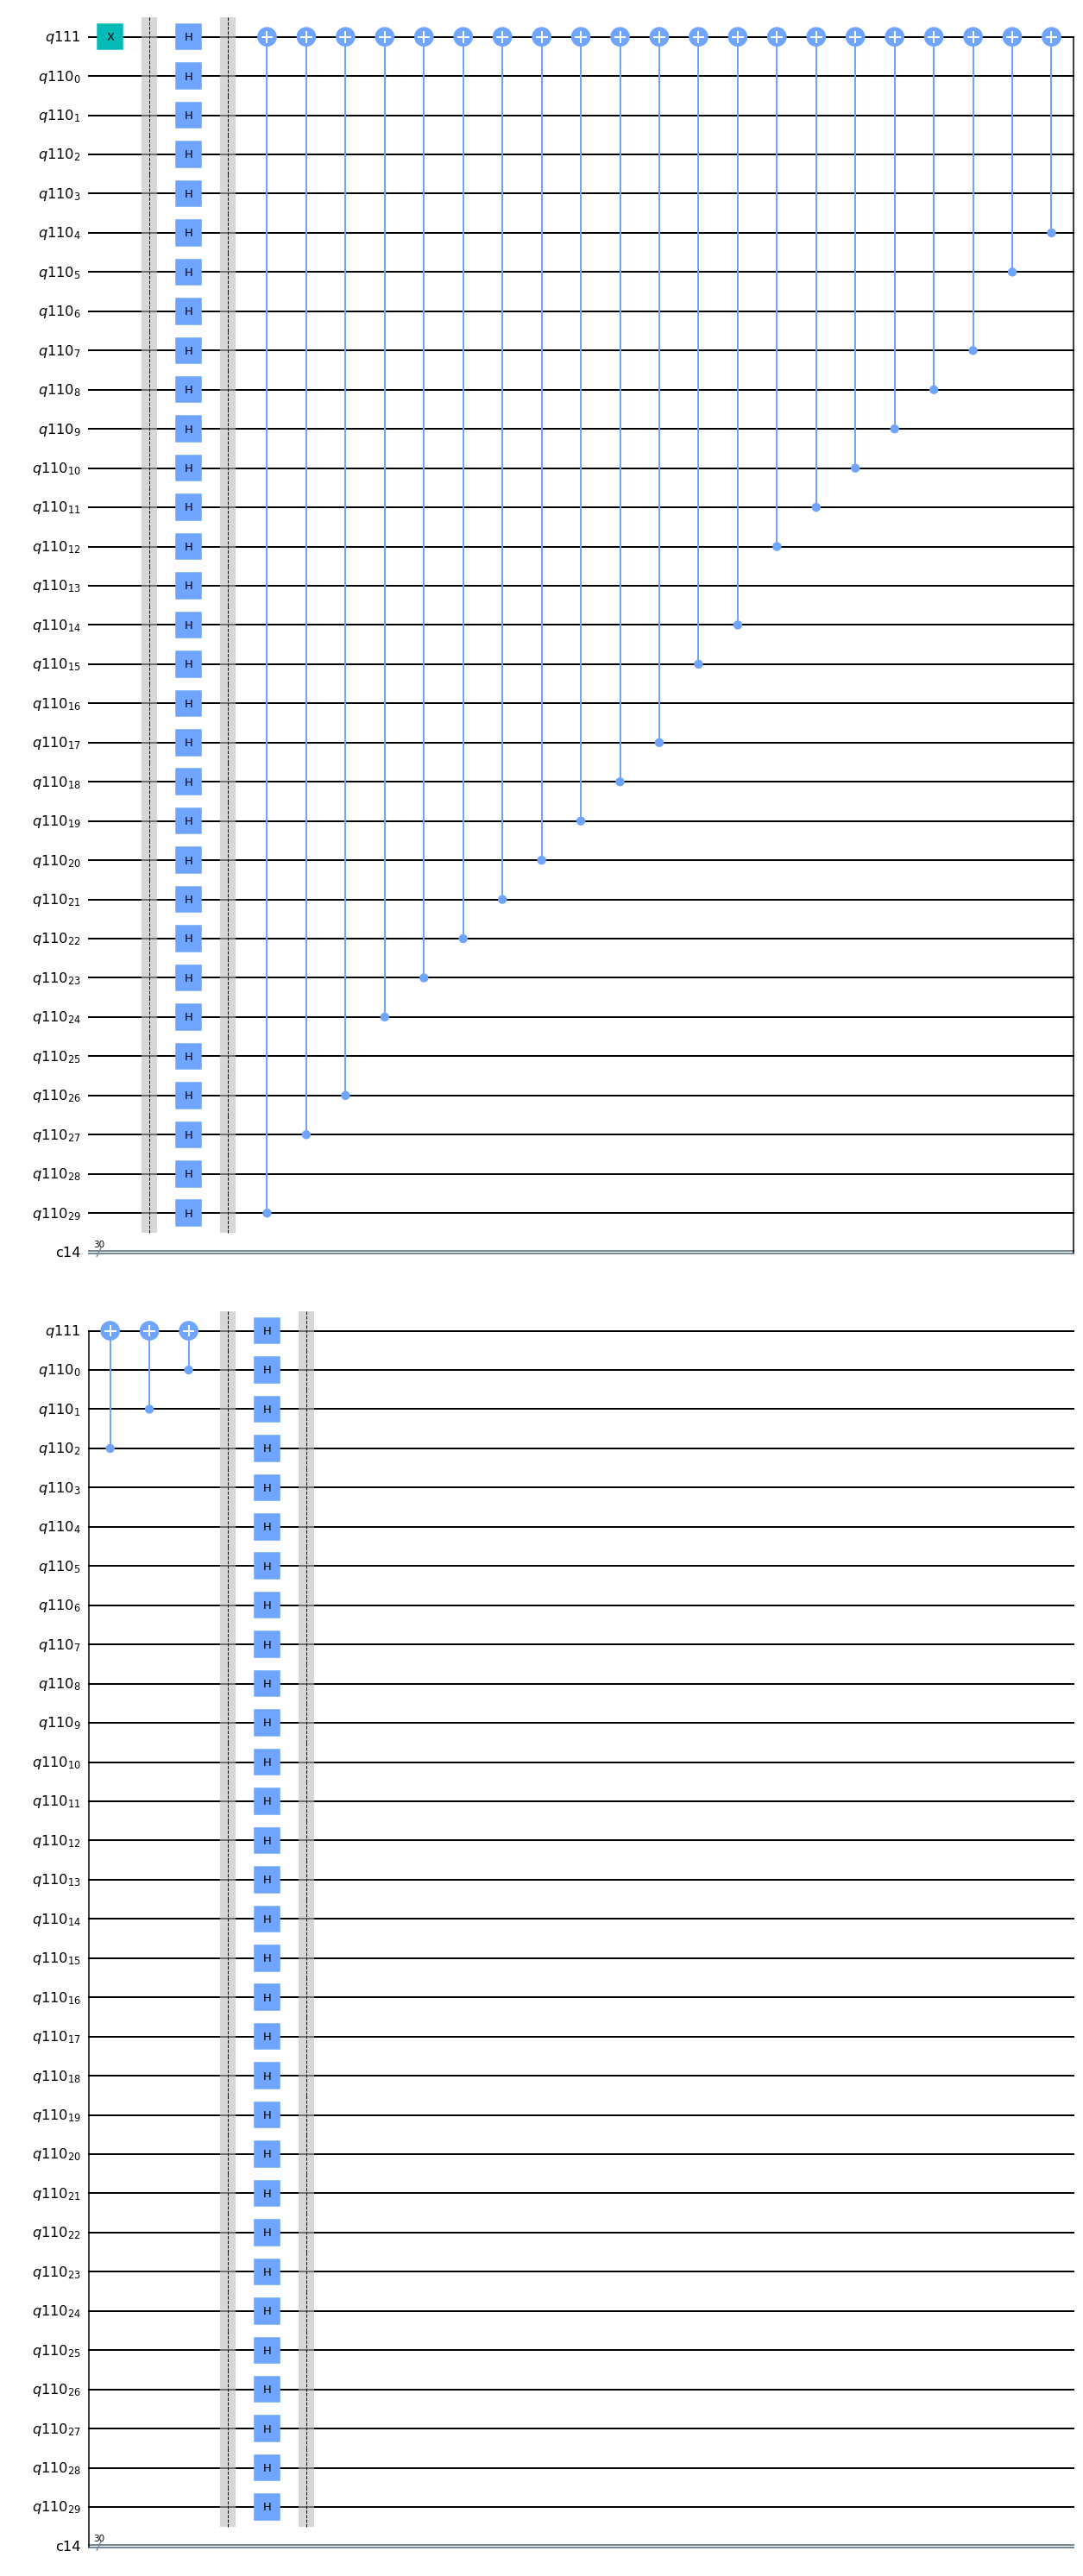

In [24]:
s = '101101111111101101111110110111'

n = len(s)
print('n = ', n)

Qc = QuantumRegister(n)
Qt = QuantumRegister(1)
C = ClassicalRegister(n)
circuito = QuantumCircuit(Qt, Qc, C)

circuito.x(Qt)
circuito.barrier()

circuito.h(Qc)
circuito.h(Qt)
circuito.barrier()

for k in range(n):
    if s[k] == '1':
        circuito.cx(Qc[n - k - 1], Qt)

circuito.barrier()

circuito.h(Qc)
circuito.h(Qt)
circuito.barrier()

#circuito.measure(Qc, C)

circuito.draw(output='mpl')

In [ ]:
back_vector = Aer.get_backend('statevector_simulator') #statevector_simulator bakend
job_vector = execute(circuito, back_vector)
resultado = job_vector.result()
vector = resultado.get_statevector(circuito, decimals=10) #Vetor de estados

In [15]:
simulador = BasicAer.get_backend('qasm_simulator')
job = execute(circuito, simulador, shots=8192)
resultado = job.result()
contagem = resultado.get_counts()
plot_histogram(contagem)

BasicAerError: 'Number of qubits 35 is greater than maximum (24) for "qasm_simulator".'